In [2]:
import pandas as pd
from datasketch import HyperLogLog
import time
import matplotlib.pyplot as plt

In [3]:
def HLLAlgo(csvfile, col, p = 14):
  df = pd.read_csv(csvfile, usecols=[col])
  hll = HyperLogLog(p=p)  # p = precision (higher = more accurate but more memory)

  start = time.time()

  for user_id in df[col]:
      hll.update(str(user_id).encode('utf8'))

  end = time.time()

  print("Estimated Unique Users:", int(hll.count()))
  print("Processing Time: %.2f seconds" % (end - start))

  actual_count = df[col].nunique()
  print("Actual Unique Users:", actual_count)

  print("Error Rate: {:.2f}%".format(100 * abs(actual_count - hll.count()) / actual_count))

  plt.bar(['Actual', 'Estimated'], [actual_count, int(hll.count())], color=['blue', 'orange'])
  plt.title("Unique User Count: Actual vs HyperLogLog Estimate")
  plt.ylabel("User Count")
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.show()


Estimated Unique Users: 66416
Processing Time: 0.20 seconds
Actual Unique Users: 65989
Error Rate: 0.65%


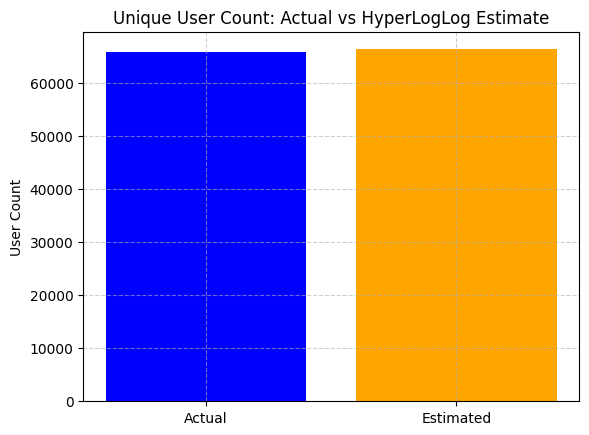

In [4]:
HLLAlgo(csvfile = "./data/atp_players.csv", col = "player_id", p = 14)

Estimated Unique Users: 574
Processing Time: 0.27 seconds
Actual Unique Users: 577
Error Rate: 0.35%


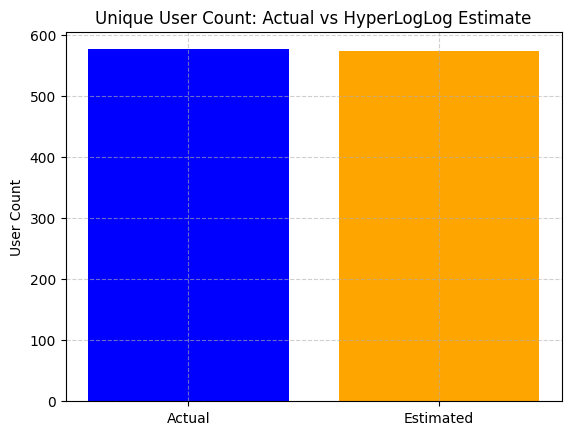

In [5]:
HLLAlgo(csvfile = "./data/0cleanDataset.csv", col = "match_num", p = 14)